In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

### object.buffer(distance, quad_segs=16, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)

### 返回该几何对象指定距离内的所有点的近似表示。

### shapely.BufferCapStyle 、 shapely.BufferJoinStyle

In [2]:
from shapely import BufferCapStyle , BufferJoinStyle

print(BufferCapStyle.flat.value , BufferJoinStyle.bevel.value)

2 3


# distance参数：

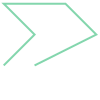

In [3]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

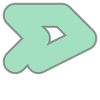

In [4]:
# 对线要素按照0.5的距离进行缓冲操作
dilated = line.buffer(0.5)
dilated

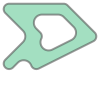

In [5]:
# 对上一步的缓冲结果按照-0.3的距离再次进行缓冲操作
eroded = dilated.buffer(-0.3)
eroded

<AxesSubplot:>

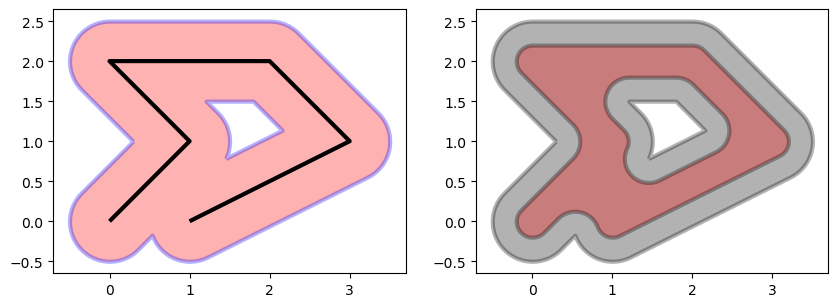

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="k" , linewidth=3)
gpd.GeoDataFrame([dilated] , columns=["geometry"]).plot(ax=ax[0] , facecolor="red" , alpha=0.3 , edgecolor="blue" , linewidth=3)


gpd.GeoDataFrame([dilated] , columns=["geometry"]).plot(ax=ax[1] ,  facecolor="k" , alpha=0.3 , edgecolor="k" , linewidth=3)
gpd.GeoDataFrame([eroded] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red" , alpha=0.3 , edgecolor="k" , linewidth=3)

# quad_segs 参数：

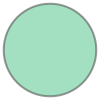

In [7]:
p = Point(0, 0).buffer(10.0)
p

In [8]:
len(p.exterior.coords)

65

In [9]:
p.area

313.6548490545941

In [10]:
import math

p.area / (math.pi * 10 * 10)

0.9983943930356188

### 在quad_segs 参数为1的情况下，缓冲区是一个矩形。

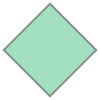

In [11]:
q = Point(0, 0).buffer(10.0 , quad_segs=1)
q

In [12]:
len(q.exterior.coords)

5

In [13]:
q.area

200.0

# single_sided参数：

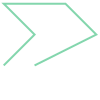

In [14]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line

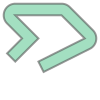

In [15]:
# 正的距离表示左边
left_hand_side = line.buffer(0.5, single_sided=True)
left_hand_side

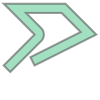

In [16]:
# 的距离表示右边
right_hand_side = line.buffer(-0.3, single_sided=True)
right_hand_side

<AxesSubplot:>

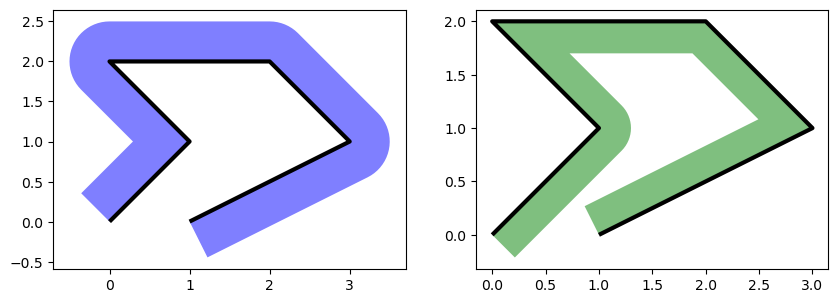

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="k" , linewidth=3)
gpd.GeoDataFrame([left_hand_side] , columns=["geometry"]).plot(ax=ax[0] , facecolor="blue" , alpha=0.5)


gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1] , edgecolor="k" , linewidth=3)
gpd.GeoDataFrame([right_hand_side] , columns=["geometry"]).plot(ax=ax[1] , facecolor="green" , alpha=0.5)

# buffer(distance=0)操作：

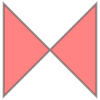

In [18]:
# 生成经典的 “领结”形式
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
bowtie = Polygon(coords)
bowtie

In [19]:
bowtie.is_valid

False

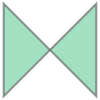

In [20]:
# buffer(distance=0)操作
clean = bowtie.buffer(0)
clean

In [21]:
clean.is_valid

True

In [22]:
len(clean.geoms) # 缓冲区操作将多边形在它们接触的地方一分为二

2

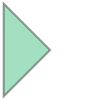

In [23]:
clean.geoms[0]

In [24]:
list(clean.geoms[0].exterior.coords)

[(0.0, 0.0), (0.0, 2.0), (1.0, 1.0), (0.0, 0.0)]

In [25]:
list(clean.geoms[1].exterior.coords)

[(1.0, 1.0), (2.0, 2.0), (2.0, 0.0), (1.0, 1.0)]

<AxesSubplot:>

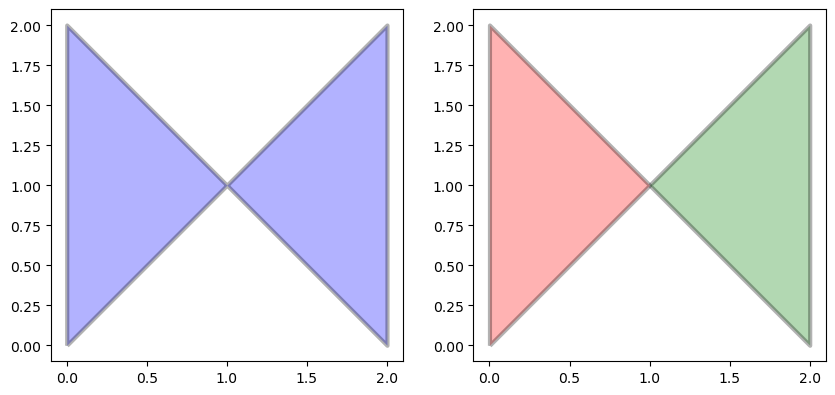

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

gpd.GeoDataFrame([bowtie] , columns=["geometry"]).plot(ax=ax[0] , facecolor="blue"  , edgecolor="k" , linewidth=3, alpha=0.3)


gpd.GeoDataFrame([clean.geoms[0]] , columns=["geometry"]).plot(ax=ax[1] , facecolor="red" , edgecolor="k" , linewidth=3, alpha=0.3)
gpd.GeoDataFrame([clean.geoms[1]] , columns=["geometry"]).plot(ax=ax[1] , facecolor="green" , edgecolor="k" , linewidth=3, alpha=0.3)